# Sales Data Analysis

## Exploratory Data Analysis



### Import Libraries and Load Data

In [115]:
# Import necessary python libraries for data analysis and visualisation

import numpy as np # numerical and mathematical operations
import pandas as pd # data manipulation and analysis
import seaborn as sns # data visualisation
import matplotlib.pyplot as plt # visualisation

In [116]:
sales = pd.read_csv('sales_data.csv')

## Data Inspection

In [117]:
sales.head() # read the first five rows of the dataframe

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [118]:
sales.tail() # read the last 5 rows of the dataframe

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
185945,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.545974e+12,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.475,14.95,7.475
185946,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.352480e+12,Électronique,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.920,7.68,3.840
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,2.674213e+12,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.000,400.00,268.000
185948,2019-12-03 10:39:00,319669,Wired Headphones,5.216304e+12,Alimentation,"778 River St, Dallas, TX 75001",1,11.99,5.995,11.99,5.995
185949,2019-12-21 21:45:00,319670,Bose SoundSport Headphones,8.081038e+12,Électronique,"747 Chestnut St, Los Angeles, CA 90001",1,99.99,49.995,99.99,49.995


In [119]:
# Check for data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [120]:
# check for any missing values in the data
sales.isnull().sum()

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [121]:
# check for duplicates
sales.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
185945    False
185946    False
185947    False
185948    False
185949    False
Length: 185950, dtype: bool

## Data Cleaning, Processing And Analysis

### Monthly Sales

In [106]:
# Extract year and month
sales['Order Year'] = sales['Order Date'].dt.year
sales['Order Month'] = sales['Order Date'].dt.month
sales.head(3)

,Order Date,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Year,Month,Total Revenue,Margin,Profit,City,Purchase City,Order Year,Order Month
0,2019-01-22 21:25:00,141234,Smart Phones,5.638009e+12,Clothes,"944 Walnut St, Boston, MA 02215",1,700.00,231.000,700.00,469.000,2019,1,700.00,469.000,469.000,944 Walnut St,Boston,2019,1
1,2019-01-28 14:15:00,141235,Charging Cables,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.475,14.95,7.475,2019,1,14.95,7.475,7.475,185 Maple St,Portland,2019,1
2,2019-01-17 13:33:00,141236,Headphones,2.113973e+12,Clothes,"538 Adams St, San Francisco, CA 94016",2,11.99,5.995,23.98,11.990,2019,1,23.98,5.995,11.990,538 Adams St,San Francisco,2019,1


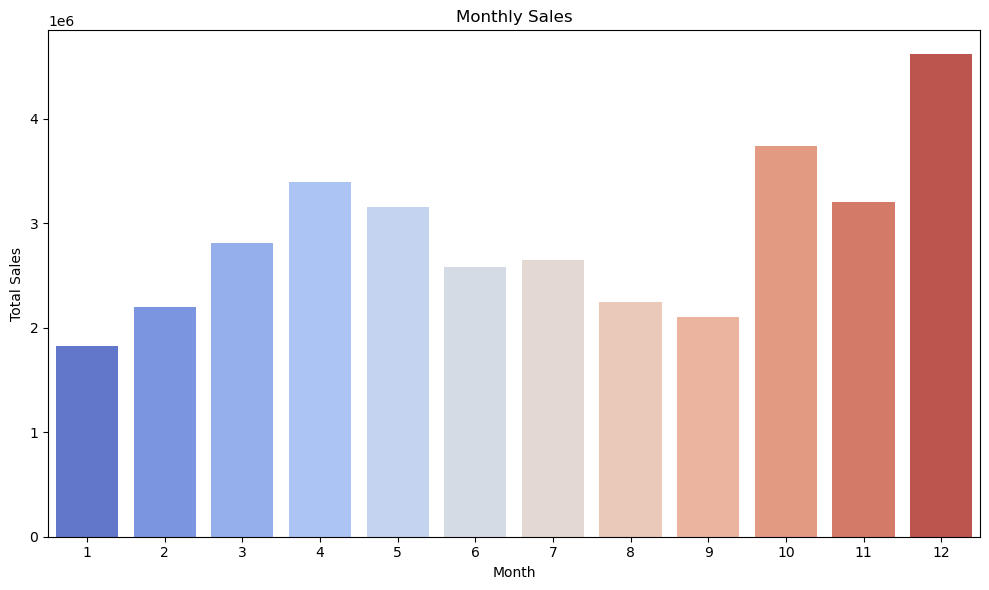

In [107]:
# Calculate the total turnover for each month
monthly_sales = sales.groupby('Order Month')['turnover'].sum().reset_index()

# Create a bar plot to visualize monthly sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Month', y='turnover', data=monthly_sales, palette='coolwarm')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  # No rotation for x-axis labels
plt.tight_layout()
plt.show()

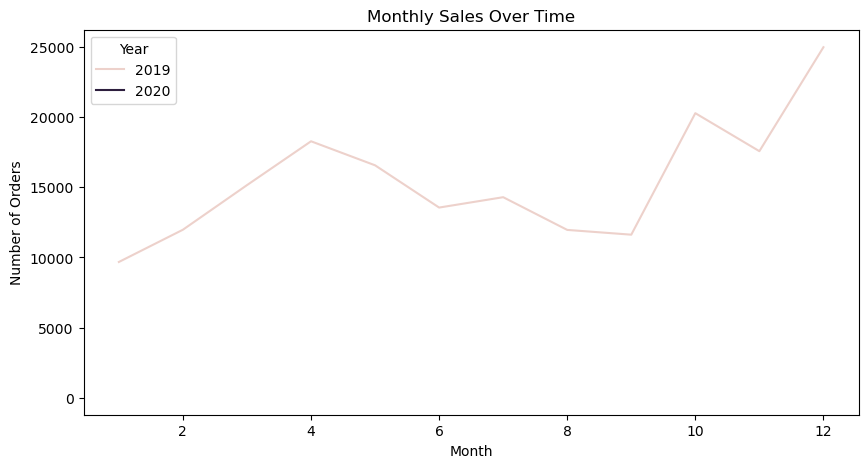

In [109]:
# Plot sales over time (monthly)
plt.figure(figsize=(10, 5))
monthly_sales = sales.groupby(['Order Year', 'Order Month']).size().reset_index(name='Count')
sns.lineplot(x='Order Month', y='Count', hue='Order Year', data=monthly_sales)
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Year')
plt.show()

#### Insights

- Seasonal Effects:
We notice a spike in April, October, as well as December.

1. April: Sales tend to go up in April because of the Easter holiday. Families buy each other gifts.
2. October: The approach of the holiday season and the preparation for Halloween and Thanksgiving drive sales in October.
3. December: The holiday season, including Christmas, Hanukkah, and New Year's Eve, typically results in higher consumer spending and gift purchases.

During these three months, companies often launch marketing campaigns, promotions, and discounts to boost sales. These efforts can lead to increased consumer spending.

### Product Count

In [94]:
def product_category(x):
    category_mapping = {
        'USB-C Charging Cable': 'Charging Cables',
        'Lightning Charging Cable': 'Charging Cables',
        'AAA Batteries (4-pack)': 'Batteries',
        'AA Batteries (4-pack)': 'Batteries',
        'Wired Headphones': 'Headphones',
        'Apple Airpods Headphones': 'Headphones',
        'Bose SoundSport Headphones': 'Headphones',
        '27in FHD Monitor': 'Smart Tv',
        '27in 4K Gaming Monitor': 'Smart Tv',
        '34in Ultrawide Monitor': 'Smart Tv',
        'Flatscreen TV': 'Smart Tv',
        '20in Monitor': 'Smart Tv',
        'iPhone': 'Smart Phones',
        'Google Phone': 'Smart Phones',
        'Vareebadd Phone': 'Smart Phones',
        'Macbook Pro Laptop': 'Laptops',
        'ThinkPad Laptop': 'Laptops',
        'LG Washing Machine': 'Cleaning Machines',
        'LG Dryer': 'Cleaning Machines',
    }
    
    return category_mapping.get(x, 'Others')

In [96]:
sales['Product'] = sales['Product'].apply(product_category)

In [97]:
sales['Product'].value_counts()

Headphones           47756
Charging Cables      43561
Batteries            41218
Smart Tv             28819
Smart Phones         14432
Laptops               8852
Cleaning Machines     1312
Name: Product, dtype: int64

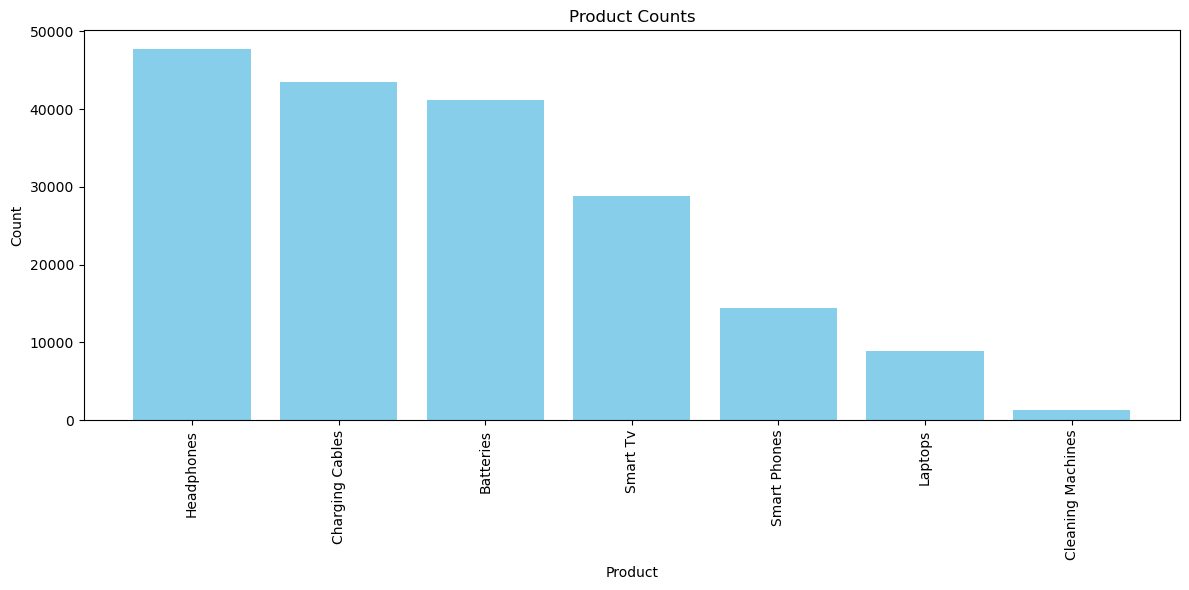

In [100]:
# Count the occurrences of each product in the 'Product' column
product_counts = sales['Product'].value_counts()

# Extract product names and their respective counts
product_names = product_counts.index
counts = product_counts.values

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(product_names, counts, color='skyblue')
plt.title('Product Counts')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()  # Ensures that the labels fit within the figure
plt.show()

- The top four most popular products are Headphones, Charging Cables, Batteries and Smart TVs.

1. Daily Necessities: Charging Cables and Batteries are essential for keeping various electronic devices, such as smartphones and laptops, powered up and functioning. These products are in constant demand due to their everyday utility.

2. Innovation in Features: Manufacturers continually add new features to products, making them more appealing. For example, wireless charging and noise-canceling technology have enhanced the appeal of certain Headphone models.

3. Technological Advancements: Products in these categories often experience rapid technological advancements and innovations, which can attract consumers looking for the latest features and improved performance.

4. Price Range: Products like Charging Cables, Batteries, and even some Headphones are available at various price points, making them accessible to a broad range of consumers.

5. Consumer Electronics: Headphones and Smart TVs fall into the consumer electronics category, which typically sees strong demand as people look to upgrade their entertainment and communication devices.

### Sales Distribution By Product Category

In [110]:
#convert french language feature to englisf
sales.rename(columns={'catégorie':'Category'},inplace=True)

In [111]:
#change category data from french to english
data_mapping = {
    'Vêtements': 'Clothes',
    'Électronique': 'Electronics'
}
sales['Category'] = sales['Category'].map(data_mapping).fillna(sales['Category'])

In [112]:
sales['Category'].value_counts()

Sports          46925
Clothes         46405
Alimentation    46342
Electronics     46278
Name: Category, dtype: int64

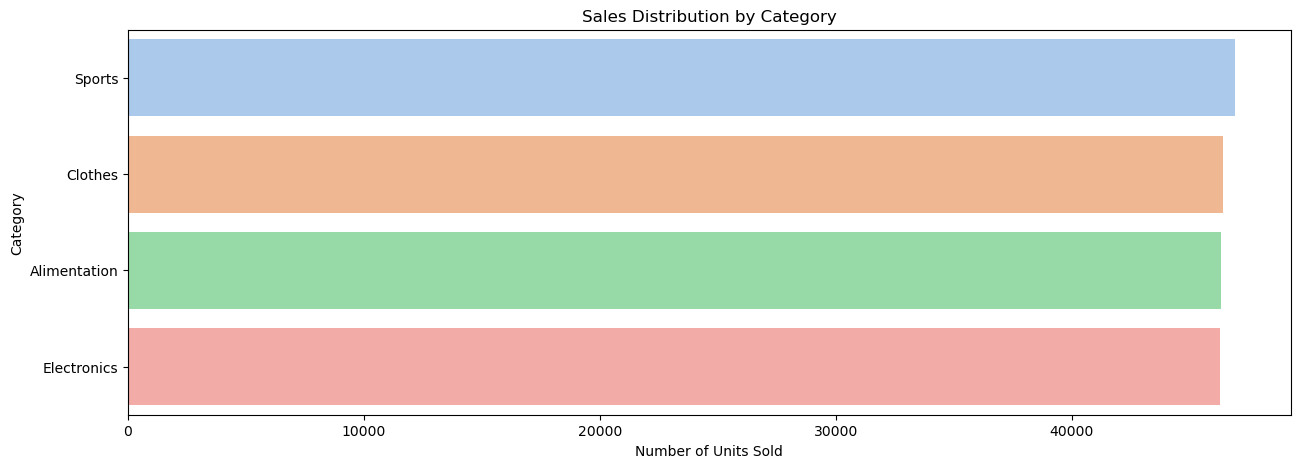

In [113]:
# Plot sales distribution by category
plt.figure(figsize=(15, 5))
category_sales = sales['Category'].value_counts()
sns.barplot(x=category_sales.values, y=category_sales.index, palette='pastel')
plt.title('Sales Distribution by Category')
plt.xlabel('Number of Units Sold')
plt.ylabel('Category')
plt.show()

Category

- The sales distribution of product categories is approximately equal. This could mean the following:

1. Diverse Customer Base: An equal sales distribution suggests that the customer base is diverse and includes individuals with different preferences and needs. This can be a positive sign as it indicates the ability to cater to a broad range of customers.

2. Market Stability: A balanced sales distribution across diverse product categories may indicate market stability. Even if one category experiences a downturn, the others can help maintain overall revenue.

3. Effective Product Mix: It suggests that the product mix is well-designed to meet various customer demands. This could result from market research and understanding customer preferences.

- To continue this equal distribution, cross-selling between these categories is a good idea. For instance, if a customer buys Electronics, you could promote related products such as headphones or batteries.

### Sales Per City

In [81]:
# extract the city from the Purchase Address column and create a new column called 'Purchase City'
sales['Purchase City']=sales['Purchase Address'].str.split(',').str[1]

In [82]:
sales.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Year,Month,Total Revenue,Margin,Profit,City,Purchase City
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,2019,1,700.00,469.0000,469.0000,944 Walnut St,Boston
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,2019,1,14.95,7.4750,7.4750,185 Maple St,Portland
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,2019,1,23.98,5.9950,11.9900,538 Adams St,San Francisco
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,2019,1,149.99,52.4965,52.4965,738 10th St,Los Angeles
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,2019,1,11.99,5.9950,5.9950,387 10th St,Austin


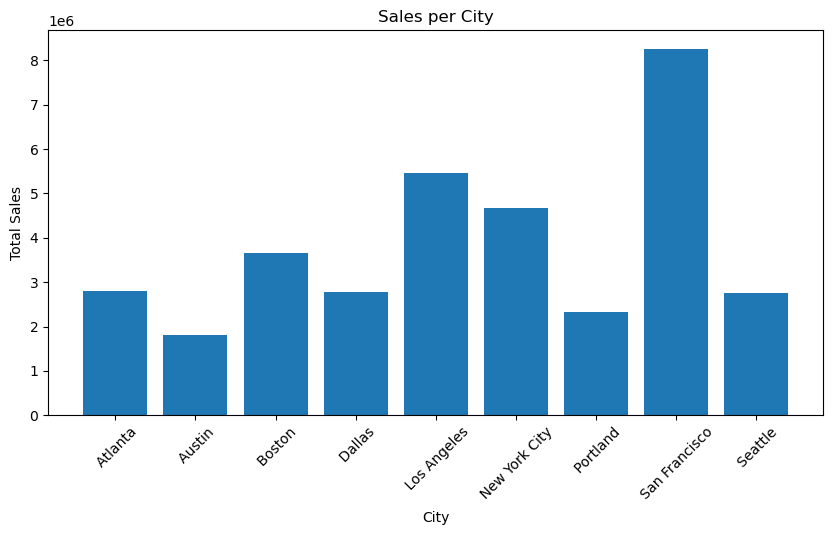

In [83]:
# Group data by city and calculate total sales per city
city_sales = sales.groupby('Purchase City')['turnover'].sum().reset_index()

# Plot sales per city
plt.figure(figsize=(10, 5))
plt.bar(city_sales['Purchase City'], city_sales['turnover'])
plt.title('Sales per City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

- San Francisco has the highest total sales, while Austin has the lowest. There are several factors that may have contributed to this.

1. The average household income is higher in San Francisco at 126,19 USD compared to 75,75 USD in Austin.

2. San Francisco is known for being one of the most expensive cities in the US, and its cost of living is higher than Austin. Therefore, salaries in San Francisco are also typically higher.

3. Tourism is one of the vital industries in San Francisco, attracting millions of visitors annually. Cities with a thriving tourism industry can experience increased sales during peak tourist seasons. San Francisco may benefit from tourism more than Austin.

### Profit Margins

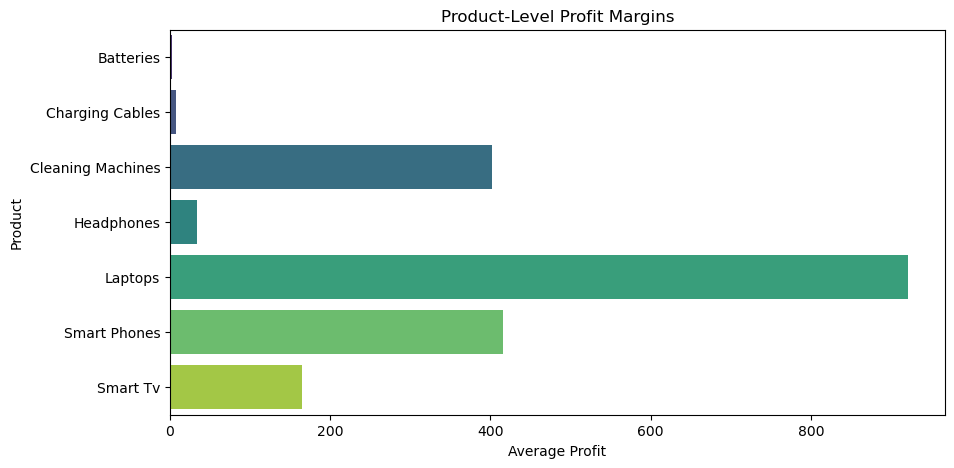

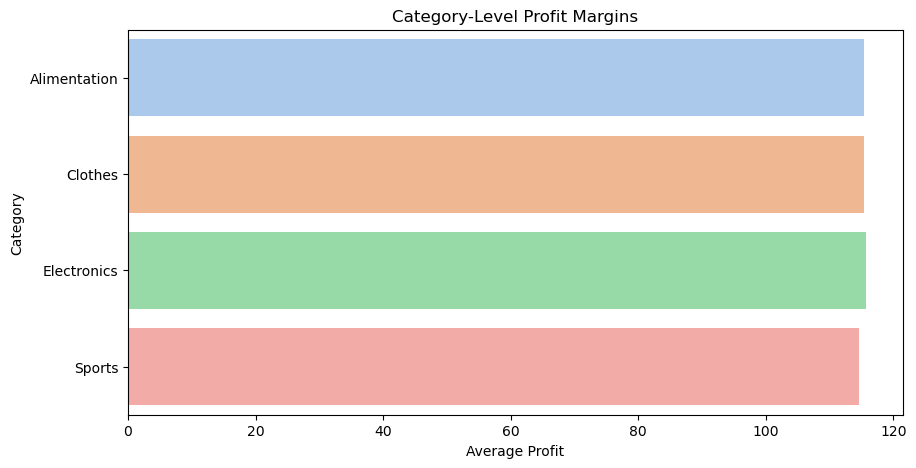

In [114]:
# Calculate total revenue for each order
sales['Total Revenue'] = sales['Quantity Ordered'] * sales['Price Each']

# Calculate profit for each order
sales['Profit'] = (sales['Quantity Ordered'] * sales['Price Each']) - (sales['Quantity Ordered'] * sales['Cost price'])

# Product-level profit margins
product_profit = sales.groupby('Product')['Profit'].mean().reset_index()

# Category-level profit margins
category_profit = sales.groupby('Category')['Profit'].mean().reset_index()

# Plot product-level profit margins
plt.figure(figsize=(10, 5))
sns.barplot(x='Profit', y='Product', data=product_profit, palette='viridis')
plt.title('Product-Level Profit Margins')
plt.xlabel('Average Profit')
plt.ylabel('Product')
plt.show()

# Plot category-level profit margins
plt.figure(figsize=(10, 5))
sns.barplot(x='Profit', y='Category', data=category_profit, palette='pastel')
plt.title('Category-Level Profit Margins')
plt.xlabel('Average Profit')
plt.ylabel('Category')
plt.show()

1. Product Pricing: Laptops and smartphones are typically high-end, premium products with a higher price point, allowing for a more substantial profit margin. In contrast, Batteries, Wired Headphones, and Charging Cables are generally lower-priced, leading to lower margins.


2. Brand and Prestige: Brands such as Apple's MacBook Pro are well-established brands known for their quality and premium pricing. Customers may be willing to pay a premium for the brand, contributing to higher margins. Conversely, generic or lesser-known brands often sell Batteries, Wired Headphones, and Charging Cables, leading to more competitive pricing and lower margins.


3. Consumer Demand: Laptops and smartphones may enjoy higher demand due to their functionality, design, and status symbol. Higher demand can lead to increased pricing power and, consequently, higher margins.


4. Market Competition: The market for Batteries, Wired Headphones, and Charging Cables may be more saturated and competitive, forcing businesses to price their products competitively and accept lower margins.


6. San Francisco is home to some of the world’s largest and most influential technology companies. The city’s financial district, known as the “Wall Street of the West,” houses numerous companies, making it a hub for finance and business. Therefore, it makes sense that laptops and smartphones would have high margins as they are mainly used in businesses and companies.


- To increase profits, companies can do a few things:


1. For products that don't make as much money, find ways to make them more attractive to customers. This might mean adding extra features or making them look nicer.


2. Look for ways to get your products for less money, like finding cheaper suppliers or materials.


3. Use good marketing to show why your products are special. Tell people what makes them different from other products.


4. It's important to know how much money you make from each product and how that affects your overall business profits. This helps you make smart decisions about what to sell and how to sell it.

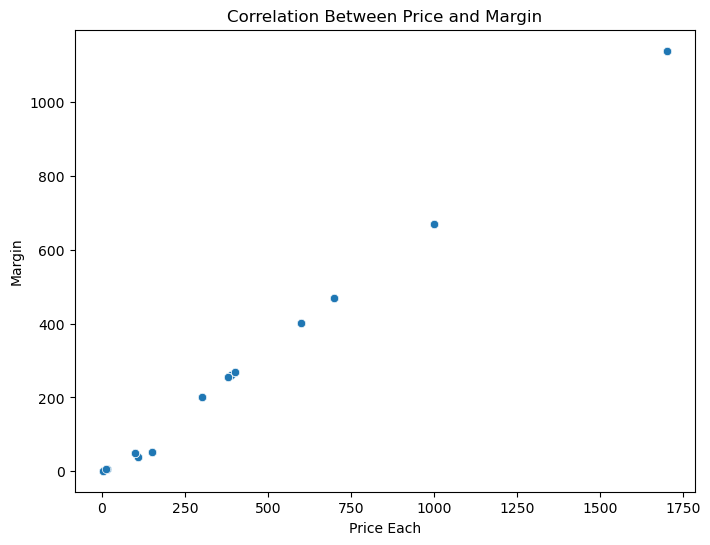

Correlation Coefficient: 0.9974765114675421


In [61]:
# correlation
# Calculate profit margin
sales['Margin'] = sales['Price Each'] - sales['Cost price']

# Scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price Each', y='Margin', data=sales)
plt.title('Correlation Between Price and Margin')
plt.xlabel('Price Each')
plt.ylabel('Margin')
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = sales['Price Each'].corr(sales['Margin'])
print(f'Correlation Coefficient: {correlation_coefficient}')

- A correlation coefficient of 0.99 between price and margin indicates a very strong and positive relationship, suggesting that changes in price are closely associated with changes in margin. Businesses should consider this relationship when setting prices and managing profitability.
 
 
- Predictability: With such a high positive correlation, you can often predict the margin of a product based on its price, and vice versa. If you know the price of a product, there's a very high likelihood that you can accurately estimate its margin.

### References

San francisco vs Austin, October 14 2020, Lakeside at Tessera on Lake Travis https://tesseraonlaketravis.com/san-francisco-vs-austin/